# Bimodal Gaussian Posterior - NPE_C method

In [1]:
import os
import sys

# Add the parent directory (lfi) to sys.path
sys.path.insert(0, os.path.abspath('..'))
import sbi
import sbi.utils
import sbi.inference
import sbi.diagnostics
import sbi.analysis
import lfi
import torch
import numpy as np

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
2024-12-10 16:56:12.344 | INFO     | lfi.config:<module>:11 - PROJ_ROOT path is: /home/givasile/github/projects/sbi


In [2]:
np.random.seed(21355)
torch.manual_seed(21)


## D=2 (slightly higher dimensionality than toy case)

In [3]:
D = 2
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros(D)
prior_sbi = prior.sbi_uniform()

### With NSF

In [22]:
density_estimator_fun = sbi.neural_nets.posterior_nn(
    model='nsf',
    hidden_features=100,
    num_transforms=5,
    z_score_x="independent",
    z_score_theta="independent",
)

In [23]:
npe_c = sbi.inference.NPE_C(prior_sbi)

In [24]:
# Algorithm 2, ie. final_round=True
num_sims = 1_000
theta = prior_sbi.sample((num_sims,))
x = sim.simulate_pytorch(theta)
_ = npe_c.append_simulations(theta, x).train()
posterior = npe_c.build_posterior().set_default_x(observation)

 Neural network successfully converged after 322 epochs.

In [25]:
posterior_samples = posterior.sample((1000,), x=observation)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

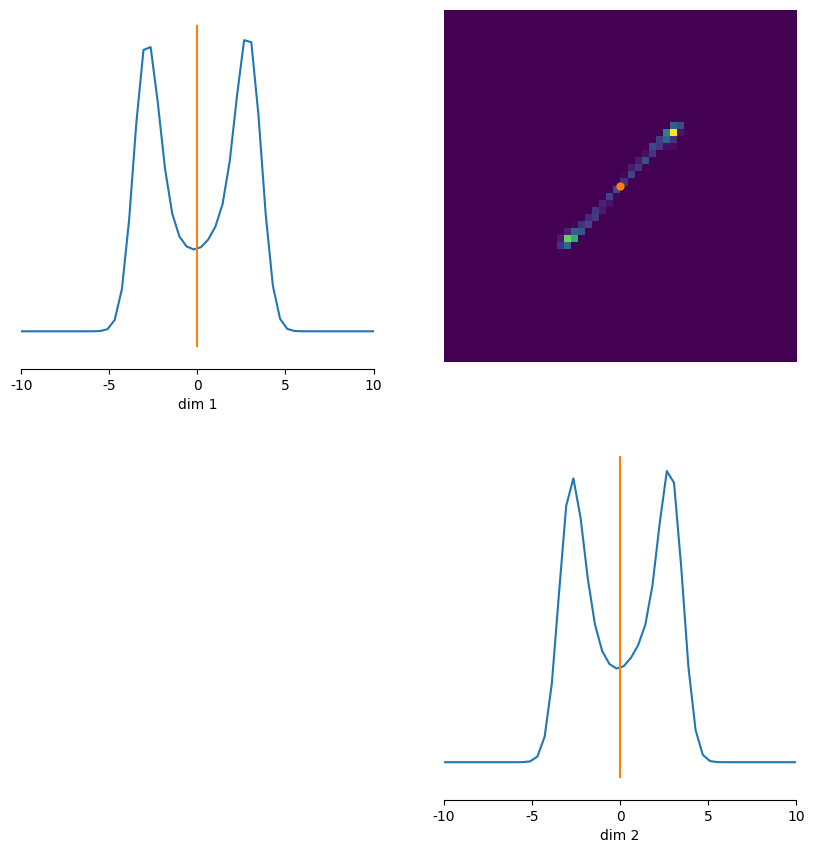

In [26]:
fig, ax = sbi.analysis.pairplot(posterior_samples, limits=torch.tensor([-10, 10.]).repeat(D, 1), points=observation, subset=[i for i in range(D)], diag="kde")

### Simulation budget: 5000

In [27]:
density_estimator_fun = sbi.neural_nets.posterior_nn(
    model='nsf',
    hidden_features=100,
    num_transforms=5,
    z_score_x="independent",
    z_score_theta="independent",
)

In [28]:
npe_c = sbi.inference.NPE_C(prior_sbi)

In [29]:
# Algorithm 2, ie. final_round=True
num_sims =20_000
theta = prior_sbi.sample((num_sims,))
x = sim.simulate_pytorch(theta)
_ = npe_c.append_simulations(theta, x, proposal=prior_sbi).train()
posterior = npe_c.build_posterior().set_default_x(observation)

 Neural network successfully converged after 190 epochs.

In [30]:
posterior_samples = posterior.sample((1000,), x=observation)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

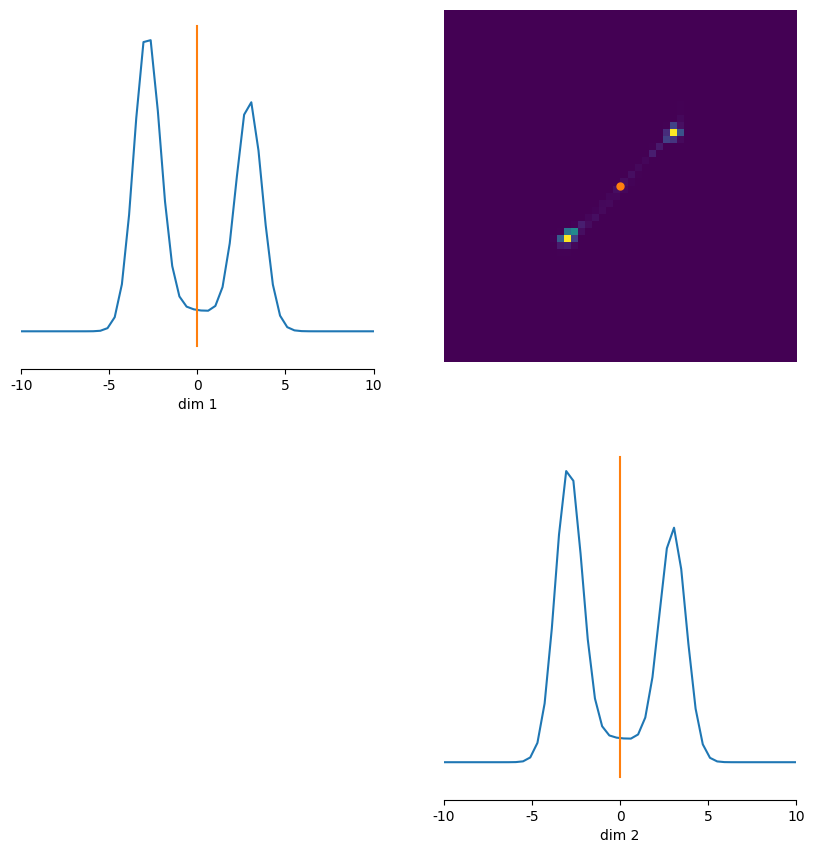

In [21]:
fig, ax = sbi.analysis.pairplot(posterior_samples, limits=torch.tensor([-10, 10.]).repeat(D, 1), points=observation, subset=[i for i in range(D)], diag="kde")